INTRODUCTION TO PANDAS - Source taken from with from the Internet, tutorial file shared by my professor.
Rerunning his file to understand pandas and numpy.

1. Pandas is arguably the most widely used Python module for Machine Learning.
2. Pandas allows us to store data in a tabular format, much like the format you
    use with Excel, CSV files, etc.
3. The data structure that makes this possible is called a DataFrame.
4. This tutorial is an introduction to Pandas DataFrames.
5. For further reference, read Wes McKinney's excellent book "Python for Data Analysis"

Let us get started!!!


In [1]:
#Suppress warnings...
import warnings
warnings.filterwarnings('ignore')

In [151]:
#Let us create a dataframe with the following columns: user_id, movie_id, rating
import pandas as pd
reviews = {"user_id": [1, 1, 2, 2, 2, 3, 4, 4, 4, 4],
           "movie_id": ["m1", "m2", "m1", "m3", "m4", "m1", "m2", "m3", "m5", "m6"],
           "rating": [2, 5, 4, 3, 5, 1, 4, 5, 3, 1]}
#let us create a DataFrame - a tabular format that should remind you of a spreadsheet
df = pd.DataFrame(reviews)
df

,user_id,movie_id,rating
0,1,m1,2
1,1,m2,5
2,2,m1,4
3,2,m3,3
4,2,m4,5
5,3,m1,1
6,4,m2,4
7,4,m3,5
8,4,m5,3
9,4,m6,1


In [3]:
#let us list all the columns ###? why output has index 
df.columns

Index(['user_id', 'movie_id', 'rating'], dtype='object')

In [4]:
#let us look at the index
df.index

RangeIndex(start=0, stop=10, step=1)

In [5]:
#let us get some information about the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   10 non-null     int64 
 1   movie_id  10 non-null     object
 2   rating    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
#let us look at the data types
df.dtypes

user_id      int64
movie_id    object
rating       int64
dtype: object

In [7]:
#let us get some basic statistics on the rating column
mean_rating = df['rating'].mean()
max_rating = df.rating.max() #note that df['rating'] and df.rating are equivalent
std_rating = df['rating'].std()
var_rating = df['rating'].var()
median_rating = df.rating.median()
#let us display all the variables
print(mean_rating, median_rating, max_rating, std_rating, var_rating)

3.3 3.5 5 1.567021236472421 2.4555555555555553


In [8]:
#here is an easier way to get all the basic stats
df.rating.describe()

count    10.000000
mean      3.300000
std       1.567021
min       1.000000
25%       2.250000
50%       3.500000
75%       4.750000
max       5.000000
Name: rating, dtype: float64

In [9]:
df['rating'].describe()

count    10.000000
mean      3.300000
std       1.567021
min       1.000000
25%       2.250000
50%       3.500000
75%       4.750000
max       5.000000
Name: rating, dtype: float64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,10.0,2.7,1.251666,1.0,2.00,2.5,4.00,4.0
rating,10.0,3.3,1.567021,1.0,2.25,3.5,4.75,5.0


In [11]:
#let us see how many unique movie ids we have
df.movie_id.nunique()

#df['movie_id'].nunique()


6

In [12]:
df.movie_id.unique()#will give you a list of unique movie ids

array(['m1', 'm2', 'm3', 'm4', 'm5', 'm6'], dtype=object)

In [13]:
#displaying selected columns, say, user id and movie id
df[["user_id", "movie_id"]]

,user_id,movie_id
0,1,m1
1,1,m2
2,2,m1
3,2,m3
4,2,m4
5,3,m1
6,4,m2
7,4,m3
8,4,m5
9,4,m6


In [15]:
#display all movies that received a rating higher than 3
df[df['rating'] > 3]['movie_id']
#Or ....
#df.loc[df['rating'] > 3, 'movie_id']
#df.loc[df['rating'] > 3]

1    m2
2    m1
4    m4
6    m2
7    m3
Name: movie_id, dtype: object

In [152]:
df[df['user_id']==1]

,user_id,movie_id,rating
0,1,m1,2
1,1,m2,5


In [16]:
#let us look at the average ratings per movie id
df.groupby('movie_id').mean()['rating']
#df.groupby('user_id').sum()['rating']


movie_id
m1    2.333333
m2    4.500000
m3    4.000000
m4    5.000000
m5    3.000000
m6    1.000000
Name: rating, dtype: float64

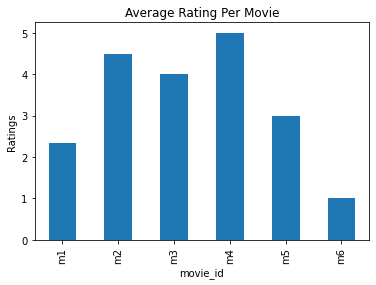

In [17]:
#let us plot a bar chart of average ratings per movie id
import matplotlib.pyplot as plt
df.groupby('movie_id').mean()['rating'].plot(kind='bar',x='movie_id',y='rating', title="Average Rating Per Movie")
plt.ylabel("Ratings")
plt.show() ##?

In [18]:
#let us create a movies dataframe
movies = {"movie_id": ["m1","m2","m3","m4","m5","m6","m7","m8","m9","m10"],
          "title": ["The Jungle Book", "The Godfather", "The Untouchables","Enter The Dragon",\
                   "The Scent of a Woman","The Good, The Bad, and The Ugly","The Bourne Supremacy", \
                   "For a Few Dollars More", "The Golden Rendezvous", "Ice Station Zebra"]}
movies_df = pd.DataFrame(movies)
movies_df

,movie_id,title
0,m1,The Jungle Book
1,m2,The Godfather
2,m3,The Untouchables
3,m4,Enter The Dragon
4,m5,The Scent of a Woman
5,m6,"The Good, The Bad, and The Ugly"
6,m7,The Bourne Supremacy
7,m8,For a Few Dollars More
8,m9,The Golden Rendezvous
9,m10,Ice Station Zebra


In [19]:
#let us merge the two dataframes using movie id as the key
merged_df = pd.merge(df, movies_df, on = 'movie_id') #default is an inner join
merged_df[['user_id','movie_id','title','rating']]

,user_id,movie_id,title,rating
0,1,m1,The Jungle Book,2
1,2,m1,The Jungle Book,4
2,3,m1,The Jungle Book,1
3,1,m2,The Godfather,5
4,4,m2,The Godfather,4
5,2,m3,The Untouchables,3
6,4,m3,The Untouchables,5
7,2,m4,Enter The Dragon,5
8,4,m5,The Scent of a Woman,3
9,4,m6,"The Good, The Bad, and The Ugly",1


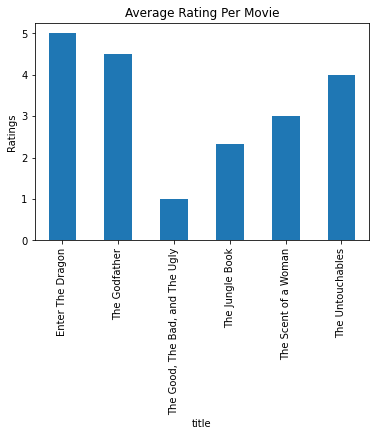

In [20]:
#let us redraw the bar chart with movie names
merged_df.groupby('title').mean()['rating'].plot(kind='bar',y='rating', title="Average Rating Per Movie")
plt.ylabel("Ratings")
plt.show()

Now, let us see how we can read in a CSV file. We will use a method called read_csv. Likewise, we can use a method called read_excel to read in an Excel file. Let us get started. I will be reading in a file called "iris.csv" (this has been uploaded to Blackboard). This dataset is often used to demonstrate machine learning algorithms. The goal is to predict the species of a flower based on 4 predictors - sepal length, sepal width, petal length, petal width. 

In [21]:
import pandas as pd
iris_data = pd.read_csv("iris.csv") 
### By default parameters for sep & header - iris_data = pd.read_csv("iris.csv", sep = ",", header = 0)
###read_json, read_excel, 
#display the first five observations
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [22]:
#Let us rename the column called "variety" - we will change it to "class"
iris_data.rename(columns = {"variety": "class"}, inplace = True) #inplace is to rename and save the dataframe

In [23]:
#let us examine the last 5 observations
iris_data.tail()

,sepal.length,sepal.width,petal.length,petal.width,class
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [24]:
#how many rows and columns do we have?
iris_data.shape #it should have 150 rows and 5 columns (4 predictors and a class/target to be predicted)

(150, 5)

In [25]:
#get some information about the variables
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
#let us get some descriptive statistics
iris_data.describe().T #same as iris_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


sepal.length       AxesSubplot(0.125,0.125;0.168478x0.755)
sepal.width     AxesSubplot(0.327174,0.125;0.168478x0.755)
petal.length    AxesSubplot(0.529348,0.125;0.168478x0.755)
petal.width     AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

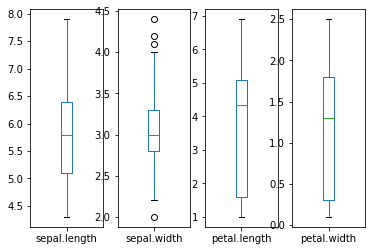

In [119]:
import matplotlib.pyplot as plt
#how about a box plot of the variables
iris_data.plot(kind='box', subplots = True)
#iris_data.plot(kind='box', subplots = False) ## default
#iris_data.plot(kind='box')
#plt.show() #?


In [28]:
#Useful to understand how dict works
dict(boxes='DarkRed', whiskers='DarkGreen',\
              medians='DarkBlue', caps='Gray')

{'boxes': 'DarkRed',
 'whiskers': 'DarkGreen',
 'medians': 'DarkBlue',
 'caps': 'Gray'}

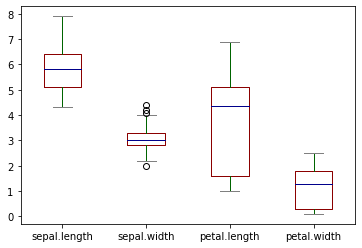

In [29]:
#let us try some colors
color = dict(boxes='DarkRed', whiskers='DarkGreen',\
              medians='DarkBlue', caps='Gray')
iris_data.plot(kind='box', color = color)
plt.show()

In [30]:
#Are the variables correlated?
iris_data.corr()
##https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


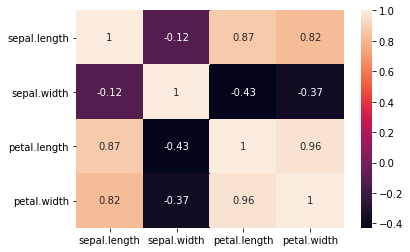

In [31]:
#how about a heatmap? I will be using a module called seaborn - you may get it by 
#typing: pip install seaborn
import seaborn as sns
sns.heatmap(iris_data.corr(),annot = True)
plt.show()

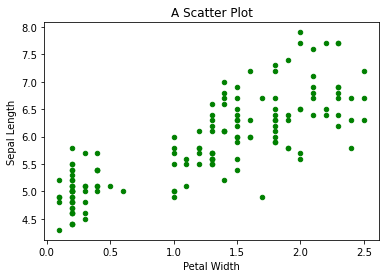

In [32]:
#let us draw a scatter plot of petal width vs sepallength
iris_data.plot(kind = 'scatter', x = 'petal.width', y = 'sepal.length', title = "A Scatter Plot", color = 'green')
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()

<AxesSubplot:xlabel='petal.width', ylabel='sepal.length'>

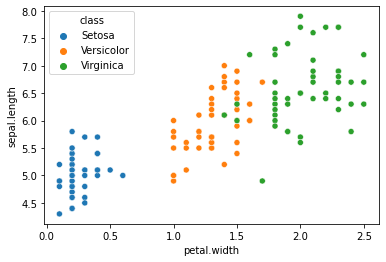

In [33]:
sns.scatterplot(x="petal.width", y="sepal.length", data=iris_data, hue="class")

In [34]:
#let us count the number of occurrences of each species
#iris_data['class'].value_counts(normalize = True) 
iris_data['class'].value_counts(normalize = False)#value_counts is used on a Pandas Series ## default 

Versicolor    50
Setosa        50
Virginica     50
Name: class, dtype: int64

We need to convert categorical variables to numbers to perform any type of analysis on our dataset. In this dataset, there is only one categorical variable - the class that we have to predict. We need to convert the three categories to numbers (e.g., 0, 1, and 2). We will look at 3 approaches for doing this......

In [35]:
#using a dictionary with map
iris_data_copy = iris_data.copy()
iris_data_copy['class'] = iris_data['class'].map({'Virginica': 0, 'Versicolor': 1, 'Setosa': 2})
iris_data_copy.head(10)
iris_data_copy['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [36]:
#using category accessor code
iris_data_copy1 = iris_data.copy()
iris_data_copy1['class'] = iris_data_copy1['class'].astype('category')
iris_data_copy1['class'] = iris_data_copy1['class'].cat.codes
iris_data_copy1.head()
iris_data_copy1['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [37]:
#Third approach: Using a LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris_data_copy2 = iris_data.copy()
iris_data_copy2['class'] = encoder.fit_transform(iris_data_copy2['class'])
#iris_data_copy2['class'].value_counts()
iris_data_copy2.head()

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


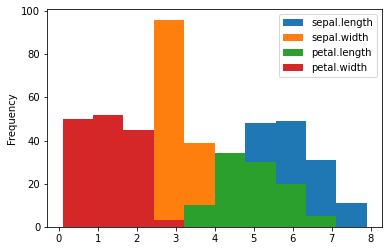

In [38]:
#how about drawing some histograms
#only the predictors will be used
iris_data_predictors = iris_data_copy2[['sepal.length','sepal.width','petal.length','petal.width']]
iris_data_predictors.plot.hist()
plt.show()

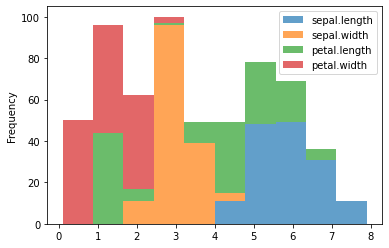

In [39]:
iris_data_predictors.plot.hist(stacked=True, alpha = 0.7) #alpha is for transparency
plt.show()

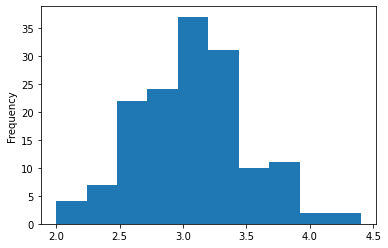

In [40]:
#what is I am interested in just one predictor?
iris_data_predictors['sepal.width'].plot.hist()
plt.show()

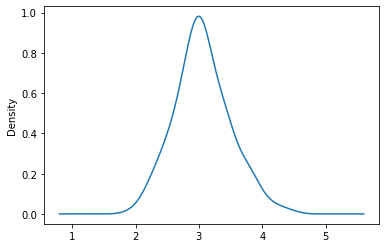

In [41]:
#how about a density plot
iris_data_predictors['sepal.width'].plot.kde()
plt.show()

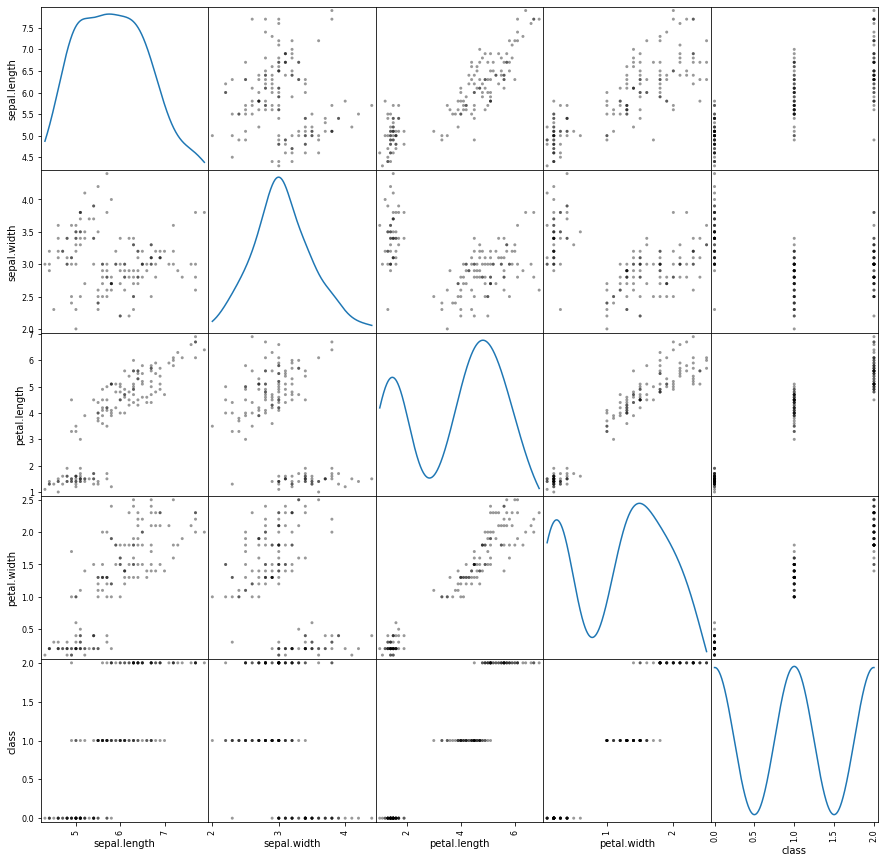

In [42]:
#Let us get a scatter matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(iris_data_copy2, figsize=(15,15), alpha = 0.4, diagonal = 'kde', color = 'black')
plt.show()

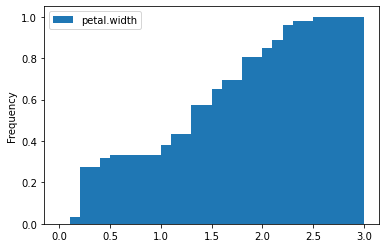

In [43]:
#let us look at a cumulative distribution
iris_data_copy1.plot(y='petal.width', kind='hist', bins=30,range=(0,3), cumulative=True, density=True)
plt.show()

In [94]:
#how do we deal with missing values? I will be using a different toy dataset for this
#let us first create a dataframe with some missing values
import numpy as np
customers = {"Name": ["Doug Walters", "Viv Richards", "Ian Chappell", "Richard Hadlee", "Andy Roberts"],
             "Age": [37, 34, np.nan,np.nan, 61],
             "Income": [100000.00, 112000.00, 101000.00, 95000.00, 99000.00],
             "CreditHistory": ["Good", "Good", "Good", "Bad", np.nan],
             "Profession": ["Programmer", "Data Analyst", "Data Analyst", "Programmer", "Programmer"]}
#Note: np.nan is used to represent a missing value
customers_df = pd.DataFrame(customers)
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
2,Ian Chappell,NaN,101000.0,Good,Data Analyst
3,Richard Hadlee,NaN,95000.0,Bad,Programmer
4,Andy Roberts,61.0,99000.0,NaN,Programmer


In [118]:
#let us display all columns that have NaNs
customers_df.loc[:3, customers_df.isnull().any()]
#customers_df.loc[:, customers_df.isnull().sum()]###?
#customers_df.loc[:, list(customers_df.notnull().all().index)]##?

,Age,CreditHistory
0,37.0,Good
1,34.0,Good
2,NaN,Good
3,NaN,Bad


In [116]:
list(customers_df.notnull().all().index)

['Name', 'Age', 'Income', 'CreditHistory', 'Profession']

In [95]:
customers_df.isnull().sum()

Name             0
Age              2
Income           0
CreditHistory    1
Profession       0
dtype: int64

In [46]:
#select columns that don't have NaNs
customers_df.loc[:, customers_df.notnull().all()]
#customers_df.loc[:, customers_df.notnull().any()]###?

,Name,Income,Profession
0,Doug Walters,100000.0,Programmer
1,Viv Richards,112000.0,Data Analyst
2,Ian Chappell,101000.0,Data Analyst
3,Richard Hadlee,95000.0,Programmer
4,Andy Roberts,99000.0,Programmer


In [47]:
#deleting rows that have NaNs
customers_df.dropna(axis = 0) #axis = 0 is for rows, axis = 1 would drop columns (see next example)

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
3,Richard Hadlee,53.0,95000.0,Bad,Programmer


In [48]:
customers_df.dropna(axis = 1)

,Name,Income,Profession
0,Doug Walters,100000.0,Programmer
1,Viv Richards,112000.0,Data Analyst
2,Ian Chappell,101000.0,Data Analyst
3,Richard Hadlee,95000.0,Programmer
4,Andy Roberts,99000.0,Programmer


In [49]:
#let us replace the missing age with the mean age of customers
mean = customers_df.Age.mean()
customers_df['Age'] = customers_df['Age'].fillna(mean)
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.00,100000.0,Good,Programmer
1,Viv Richards,34.00,112000.0,Good,Data Analyst
2,Ian Chappell,46.25,101000.0,Good,Data Analyst
3,Richard Hadlee,53.00,95000.0,Bad,Programmer
4,Andy Roberts,61.00,99000.0,NaN,Programmer


In [50]:
#Set age of Chappell back to nan
import numpy as np
customers_df.loc[customers_df['Name'] == "Ian Chappell", 'Age'] = np.nan
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
2,Ian Chappell,NaN,101000.0,Good,Data Analyst
3,Richard Hadlee,53.0,95000.0,Bad,Programmer
4,Andy Roberts,61.0,99000.0,NaN,Programmer


In [51]:
#let us use Python's Impute class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(customers_df[['Age']])
imputed_train_df = imp_mean.transform(customers_df[['Age']])
customers_df['Age'] = imputed_train_df
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.00,100000.0,Good,Programmer
1,Viv Richards,34.00,112000.0,Good,Data Analyst
2,Ian Chappell,46.25,101000.0,Good,Data Analyst
3,Richard Hadlee,53.00,95000.0,Bad,Programmer
4,Andy Roberts,61.00,99000.0,NaN,Programmer


In [52]:
#Let us use a package called impyute to impute a value for age - first reset the age to Nan
customers_df.loc[customers_df['Name'] == "Ian Chappell", 'Age'] = np.nan
#let us convert categorical variables to dummies
df = pd.get_dummies(customers_df, columns = ['CreditHistory', 'Profession'], drop_first = True) #this replaces nan with 0
df.loc[df['Name'] == 'Andy Roberts','CreditHistory_Good'] = np.nan #setting it back to nan
df


,Name,Age,Income,CreditHistory_Good,Profession_Programmer
0,Doug Walters,37.0,100000.0,1.0,1
1,Viv Richards,34.0,112000.0,1.0,0
2,Ian Chappell,NaN,101000.0,1.0,0
3,Richard Hadlee,53.0,95000.0,0.0,1
4,Andy Roberts,61.0,99000.0,NaN,1


In [53]:
!pip install impyute

In [54]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(df[['Age','CreditHistory_Good']].values, k=3)
imputed_training

array([[37.        ,  1.        ],
       [34.        ,  1.        ],
       [39.55718088,  1.        ],
       [53.        ,  0.        ],
       [61.        ,  0.82826807]])

In [55]:
!pip install fancyimpute

In [56]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute #pip install fancyimpute
df = pd.get_dummies(customers_df, columns = ['CreditHistory', 'Profession'], drop_first = True) #this replaces nan with 0
df.loc[df['Name'] == 'Andy Roberts','CreditHistory_Good'] = np.nan #setting it back to nan
df 

,Name,Age,Income,CreditHistory_Good,Profession_Programmer
0,Doug Walters,37.0,100000.0,1.0,1
1,Viv Richards,34.0,112000.0,1.0,0
2,Ian Chappell,NaN,101000.0,1.0,0
3,Richard Hadlee,53.0,95000.0,0.0,1
4,Andy Roberts,61.0,99000.0,NaN,1


In [57]:
nan_matrix = df[['Age','Income','CreditHistory_Good','Profession_Programmer']]
new_matrix = KNN(k=3).fit_transform(nan_matrix)
pd.DataFrame(new_matrix, columns = ['Age','Income','CreditHistory_Good','Profession_Programmer'] )

Imputing row 1/5 with 0 missing, elapsed time: 0.001


,Age,Income,CreditHistory_Good,Profession_Programmer
0,37.000000,100000.0,1.000000,1.0
1,34.000000,112000.0,1.000000,0.0
2,40.720932,101000.0,1.000000,0.0
3,53.000000,95000.0,0.000000,1.0
4,61.000000,99000.0,0.949129,1.0


In [58]:
#Let us try MICE - Multiple Imputation by Chained Equations
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(df[['Age','CreditHistory_Good']].values)
imputed_training

array([[37.        ,  1.        ],
       [34.        ,  1.        ],
       [35.38385981,  1.        ],
       [53.        ,  0.        ],
       [61.        , -0.34723194]])

In [59]:
!pip install pathlib

In [60]:
!pip install ruamel-yaml

In [61]:
!pip install yfinance

In [62]:
import yfinance as yf #pip install fix_yahoo_finance
import matplotlib.pyplot as plt
start_date = '2022-06-01'
end_date = '2022-06-19'
data = yf.download("VTI", start=start_date, end=end_date)
data.loc['2022-Jun':'2022-Jun', :] #slice by date

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,207.669998,208.320007,203.460007,205.000000,205.000000,3087800
2022-06-02,205.000000,209.199997,204.000000,209.179993,209.179993,2977800
2022-06-03,206.679993,207.610001,205.300003,205.839996,205.839996,2693000
2022-06-06,208.119995,208.789993,205.910004,206.449997,206.449997,2745500
2022-06-07,204.630005,208.880005,204.350006,208.690002,208.690002,3350500
2022-06-08,207.929993,208.699997,205.910004,206.350006,206.350006,2187200
2022-06-09,205.419998,206.330002,201.380005,201.410004,201.410004,3061100
2022-06-10,198.389999,198.389999,195.360001,195.429993,195.429993,5701100
2022-06-13,190.649994,191.179993,186.679993,187.449997,187.449997,10468300


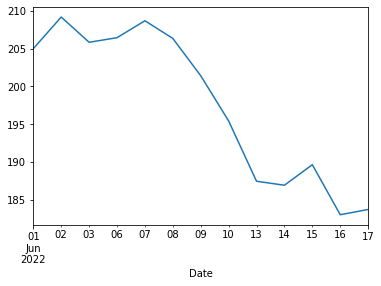

In [63]:
data['Adj Close'].plot()
plt.show()

In [64]:
#reading datasets from a link - let us read in the titanic dataset
titanic_df = pd.read_csv("https://assets.datacamp.com/production/course_1639/datasets/titanic.csv")
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [65]:
#how many classes did the ship have [e.g., first class]
titanic_df['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [66]:
#how many survived from each class?
survival_by_class = titanic_df.groupby('pclass')['survived'].value_counts()
survival_by_class

pclass  survived
1       1           200
        0           123
2       0           158
        1           119
3       0           528
        1           181
Name: survived, dtype: int64

In [67]:
df1=pd.DataFrame([[1,2,3],[2,3,1],column=[a,b,c]])

SyntaxError: invalid syntax (<ipython-input-67-cc69ec815cc8>, line 1)

This is the end of the tutorial. Note that this is by no means a complete coverage of the capabilties of Pandas. Be sure to read Wes 